In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
divar_df = pd.read_csv('DivarFinal.csv', encoding='utf-8')

In [3]:
divar_df.head()

,Address,Area,Year,Number Of Room,Price,Price per meter,Floor,Elevator,Parking,Warehouse
0,کوی بیمه,105,1395,2,4100000000,39048000,4,1,1,1
1,فرمانیه,755,1398,4,150000000000,198675000,10,1,1,1
2,پونک,68,1381,2,2460000000,36176000,1,0,1,1
3,کوی بیمه,88,1396,2,3200000000,36364000,5,1,1,1
4,پردیس,135,1398,3,2500000000,18519000,0,1,1,1


In [4]:
divar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Address          11099 non-null  object
 1   Area             11099 non-null  int64 
 2   Year             11099 non-null  int64 
 3   Number Of Room   11099 non-null  object
 4   Price            11099 non-null  int64 
 5   Price per meter  11099 non-null  int64 
 6   Floor            11099 non-null  object
 7   Elevator         11099 non-null  int64 
 8   Parking          11099 non-null  int64 
 9   Warehouse        11099 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 867.2+ KB


In [5]:
divar_df.describe()

,Area,Year,Price,Price per meter,Elevator,Parking,Warehouse
count,11099.000000,11099.000000,1.109900e+04,1.109900e+04,11099.000000,11099.000000,11099.000000
mean,99.346067,1391.078476,4.795949e+09,3.909941e+07,0.756014,0.801604,0.894405
std,101.421444,7.463570,9.350471e+09,3.311463e+07,0.429504,0.398810,0.307333
min,3.000000,1370.000000,1.000000e+08,2.000000e+06,0.000000,0.000000,0.000000
25%,65.000000,1385.000000,1.235000e+09,1.916700e+07,1.000000,1.000000,1.000000
50%,87.000000,1392.000000,2.700000e+09,3.400000e+07,1.000000,1.000000,1.000000
75%,117.000000,1398.000000,5.547000e+09,5.149650e+07,1.000000,1.000000,1.000000
max,8200.000000,1400.000000,4.000000e+11,1.000000e+09,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Price per meter'}>,
        <AxesSubplot:title={'center':'Elevator'}>,
        <AxesSubplot:title={'center':'Parking'}>],
       [<AxesSubplot:title={'center':'Warehouse'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

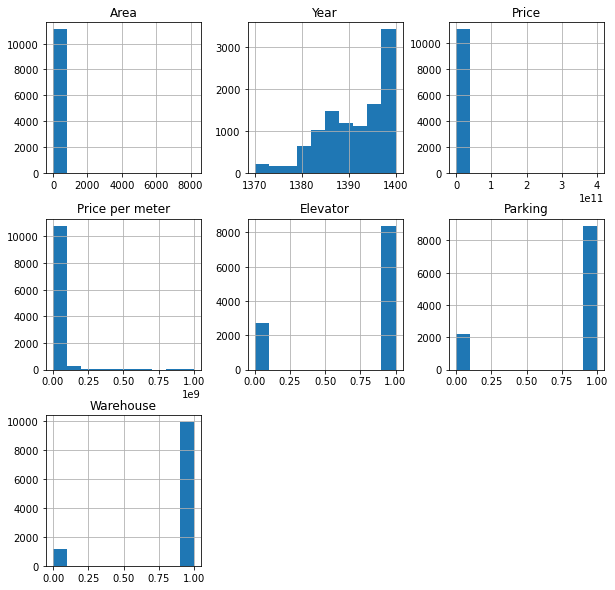

In [6]:
divar_df.hist(bins=10, figsize=(10, 10))

<AxesSubplot:xlabel='Year', ylabel='Price'>

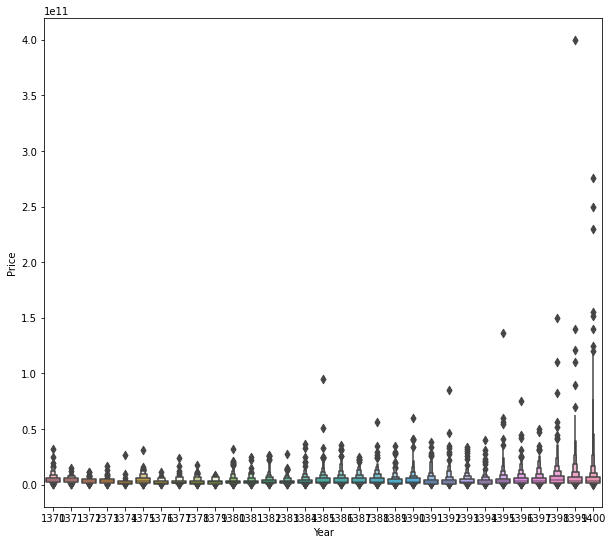

In [7]:
plt.figure(figsize=(10,9))
sns.boxenplot(x= 'Year', y ='Price', data=divar_df)

In [8]:
divar_df.groupby('Year').mean().Price

Year
1370    5.225381e+09
1371    4.634643e+09
1372    3.995741e+09
1373    4.493960e+09
1374    3.510556e+09
1375    4.469608e+09
1376    2.594146e+09
1377    3.485135e+09
1378    2.839494e+09
1379    2.883333e+09
1380    3.189966e+09
1381    3.010637e+09
1382    3.580822e+09
1383    3.033305e+09
1384    3.538959e+09
1385    4.381561e+09
1386    4.449348e+09
1387    4.459904e+09
1388    4.678192e+09
1389    3.657226e+09
1390    4.402288e+09
1391    4.050401e+09
1392    4.043726e+09
1393    3.927745e+09
1394    3.501945e+09
1395    4.687229e+09
1396    4.861858e+09
1397    5.134332e+09
1398    6.630941e+09
1399    6.928284e+09
1400    6.473231e+09
Name: Price, dtype: float64

In [9]:
divar_df.groupby('Parking').mean().Price

Parking
0    1.375789e+09
1    5.642436e+09
Name: Price, dtype: float64

In [10]:
divar_df.groupby('Elevator').mean().Price

Elevator
0    1.793295e+09
1    5.764986e+09
Name: Price, dtype: float64

In [11]:
divar_df.groupby('Warehouse').mean().Price

Warehouse
0    1.657501e+09
1    5.166480e+09
Name: Price, dtype: float64

In [12]:
divar_df.head()

,Address,Area,Year,Number Of Room,Price,Price per meter,Floor,Elevator,Parking,Warehouse
0,کوی بیمه,105,1395,2,4100000000,39048000,4,1,1,1
1,فرمانیه,755,1398,4,150000000000,198675000,10,1,1,1
2,پونک,68,1381,2,2460000000,36176000,1,0,1,1
3,کوی بیمه,88,1396,2,3200000000,36364000,5,1,1,1
4,پردیس,135,1398,3,2500000000,18519000,0,1,1,1


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(divar_df['Address'])
divar_df['Address'] = le.transform(divar_df['Address'])

In [48]:
from sklearn.model_selection import train_test_split
X = divar_df.drop(['Price'], axis=1)
y = divar_df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm_classifier = LinearRegression()

In [51]:
lm_classifier.fit(X_train, y_train)

LinearRegression()

In [52]:
y_predict = lm_classifier.predict(X_test)

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.84230692498069